# Simple Quantum Implementation using Qiskit Aqua for Boolean satisfiability problems



This Jupyter notebook demonstrates how easy it is to use quantum algorithms from [Qiskit Aqua](https://qiskit.org/aqua) to solve Boolean satisfiability problems [(SAT)](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem). 

It is based on the Qiskit tutorial [
Using Grover search for boolean satisfiability](https://github.com/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/grover_search_party.ipynb) by [James Weaver](http://twitter.com/JavaFXpert).

Implemented by [Jan-R. Lahmann](http://twitter.com/JanLahmann) using Qiskit, binder and RISE.

## Boolean Satisfiabilty problems (SAT)

The Boolean satisfiability problem [(SAT)](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem) considers a Boolean expression with N boolean variables involving negation (NOT, $\neg$), conjunction (AND, $\wedge$) and disjunction (OR, $\vee$), as in the following (simple) example:  
$$ f(x_1, x_2) = (x_1 \vee x_2) \wedge (x_1 \vee \neg x_2) . $$

The problem is to determine whether there is any assignment of values (TRUE, FALSE) to the Boolean variables which makes the formula true. 

It's something like trying to flip a bunch of switches to find the setting that makes a light bulb turn on.  
SAT is of central importance in many areas of computer science, including complexity theory, algorithmics, cryptography, artificial intelligence, circuit design, and automatic theorem proving.

SAT was the first problem proven to be NP-complete.  
This means that all problems in the [complexity class NP](https://en.wikipedia.org/wiki/NP_(complexity)) are at most as difficult to solve as SAT. 

There is no known classical algorithm that efficiently solves each SAT problem, and it is generally believed that no such algorithm exists.  
Whether Boolean satisfiability problems have a classical algorithm that is polynomial in time is equivalent to the [P vs. NP problem](https://en.wikipedia.org/wiki/P_versus_NP_problem).  


While [Grover's quantum search algorithm](https://en.wikipedia.org/wiki/Grover's_algorithm) does not provide exponential speed-up to this problem, it may nevertheless provide some speed-up in contrast to classical black-box search strategies.



## Solving 3-SAT using Qiskit Aqua and Grover's search algorithm
### Throwing a party while avoiding the drama

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. 

Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. 

Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover's quantum search algorithm to identify friendly combinations of people to invite?

The constraints for our party planning problem may be formulated with the following boolean expression:

        ((A and B) or (C and D)) and not (A and D)


To apply a quantum algorithm from Qiskit Aqua to this problem, we simply need to import the Qiskit libraries and run the algorithm with the appropriate parameters.

In [1]:
# Import the necessary functions from Qiskit
from qiskit import qiskit
from qiskit.visualization import plot_histogram
# from qiskit.utils import QuantumInstance
from qiskit_algorithms import Grover
from qiskit.circuit.library import PhaseOracle
from qiskit_aer import Aer
from qiskit_algorithms import AmplificationProblem

Let's go ahead and use our expression in a Grover quantum search to find out compatible combinations of people to invite.

Note: We'll represent and with "&", or with "|", not with "~" in our expression.

In [2]:
# Define the formal logical expression corresponding to our "party problem"
log_expr = "((A & B) | (C & D)) & ~(A & D)"

Let's run the algorithm on a quantum simulator and plot the result.

Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

In [3]:
# Run the algorithm on a simulator, and print a histogram of the result
# The logical expression can automatically be transformed into a form suitable for Grover's algorithm
oracle = PhaseOracle(log_expr)
backend = Aer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=backend)
problem = AmplificationProblem(oracle)
result = grover.amplify(problem)
plot_histogram(result.circuit_results)

MissingOptionalLibraryError: "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."

The result shows that the assignments 0011, 0111, 1100, 1110 for David-Carol-Bob-Alice are potential solutions to the problem.  
Whether or not these are correct solutions to the problem can be verified efficiently, as 3-SAT is in NP.  
Note that the variables in the histogram are in reverse order: David-Carol-Bob-Alice instead of Alice-Bob-Carol-David.


### Now it's your turn to play!

Create and implement your own scenario that can be modeled as a boolean satisfiability problem using Grover search. Have fun with it, and carry on with your quantum computing journey!

In [4]:
# Define the formal logical expression corresponding to our "party problem"
log_expr = '((A & C) | (B & D)) & ~(A & D)'

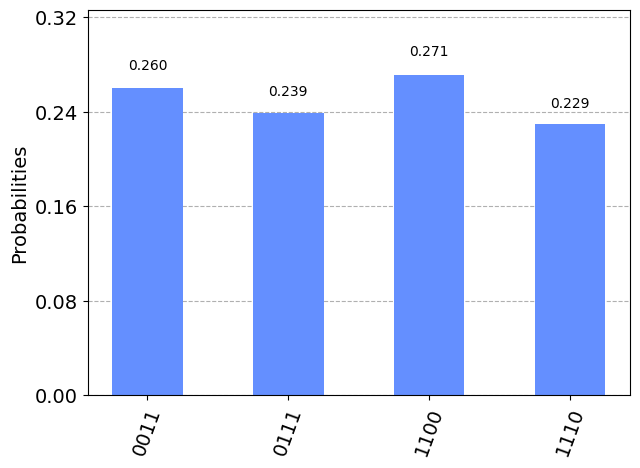

In [5]:
# Run the algorithm 
oracle = PhaseOracle(log_expr)
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=200)
grover = Grover(quantum_instance=backend)
problem = AmplificationProblem(oracle)
result = grover.amplify(problem)
plot_histogram(result.circuit_results)

In [6]:
# Print Qiskit version 
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}